# FINANCIAL SERVICES USE IN TANZANIA

### 1. Examine the dataset. Are there any missing observations or columns where the data do not seem valid?

* Import all modules needed
* Reading the csv file using pandas
* Checking for missining values

In [1]:
#installing modules 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
training = pd.read_csv('training.csv')

There are no columns with missing values

### 2. Get basic descriptive statistics for the dataset.

In [2]:
training.describe()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


### renaming columns 

In [3]:
training.rename(columns={'Q1':'age','Q2':'gender','Q3':'marital_status','Q4':'highest education','Q5':'Which_of_the_following_applies_to_you?','Q6':'land_owner','Q7':'own_a_mobile','Q8_1':'salaries','Q8_2':'money_from_trading','Q8_3':'money_from_providing_service','Q8_4':'piece_work','Q8_5':'rental_income','Q8_6':'interest_from_savings','Q8_7':'Pension','Q8_8':'social_welfare_money','Q8_9':'rely_on_someone_else','Q8_10':"don't_get_money",'Q8_11':'other','Q11':'providing_service', 'Q10':'types_of_income'}, inplace=True)
number_to_gender= {1:'female',2:'male'
}
mobile_mney={0:'no',1:'yes'  
}
mmc= {0:'no_mobile_money',1:'one_finacial_service',2:'mobile_money_only',3:'mobile_money_and_other'
}
ms={1:'married',2:'divorced',3:'widowed',4:'single/never_married'
}
svng={0:'no',1:'yes'
}
lo={1:'yes',2:'no'
}
qy={-1:'not_applicable',1:'never',2:'daily',3:'weekly',4:'monthly',5:'less_often'
}

typ={
    -1:'Not applicable',1:'Personalservices',
    2:'Telecommunications/IT',3:'Financialservices',
    4:'Transport',5:'Hospitality',
    6:'Information/Research',7:'Technical',
    8:'Childcare',9:'Healthservices',
    10:'Legalservices',11:'Security',
    12:'Other'   
}
types={
    -1:'Not applicable',
    1:'Produce I grow',
    2:'Products from livestock',
    3:'Livestock',
    4:'Aquaculture',
    5:'Agricultural products',
    6:'Non-agricultural products',
    7:'Things you make',
    8:'Collection from nature',
    9:'Things you process',
    10:'Other'
}
training.providing_service = training.providing_service.map(typ)
training.types_of_income = training.types_of_income.map(types)
training.gender = training.gender.map(number_to_gender)
training.mobile_money_classification = training.mobile_money_classification.map(mmc)
training.marital_status = training.marital_status.map(ms)
training.mobile_money = training.mobile_money.map(mobile_mney)
training.savings = training.savings.map(svng)
training.land_owner = training.land_owner.map(lo)
training.Q16 = training.Q16.map(qy)
training.Q17 = training.Q17.map(qy)


## 3.Create appropriate graphs to visually represent the relationship between financial services accessed (non-mobile, mobile, both) and age, gender, marital status, land ownership and type of income.

### both financial services versus age

* creating a new dataframe for mobile_money_classification and age
* ploting stacked bar graph in search for relationship between mobile_money_classification and age

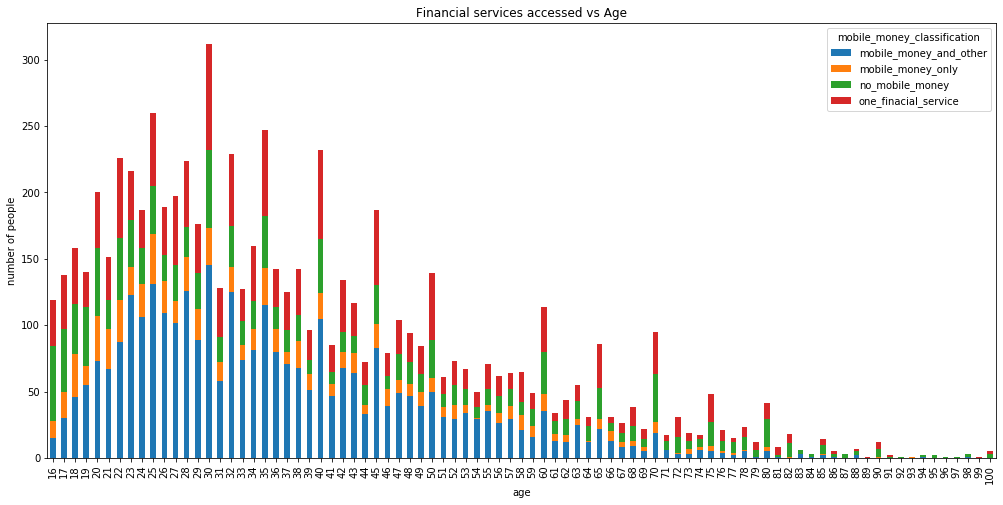

In [4]:
mobile_age = training.groupby(['age', 'mobile_money_classification'])['age'].count().unstack('mobile_money_classification').fillna(0)
mobile_age.plot(kind='bar', figsize=(17, 8), label='male', stacked=True)
plt.xlabel('age')
plt.ylabel('number of people')
plt.title('Financial services accessed vs Age')
plt.show()

In [5]:
mobile_age.head()

mobile_money_classification,mobile_money_and_other,mobile_money_only,no_mobile_money,one_finacial_service
age,,,,
16,15.0,13.0,56.0,35.0
17,30.0,20.0,47.0,41.0
18,46.0,32.0,38.0,42.0
19,55.0,14.0,45.0,26.0
20,73.0,34.0,51.0,42.0


In [6]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import numpy as np
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.express as px

between the age of 18 and 59 most of the people use mobile_money_and_other, with all the age groups theres is few people with mobile_money_ only but the is still alot of people with with no financial services.

### non-mobile, mobile and both financial service gender

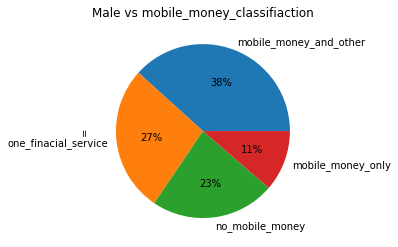

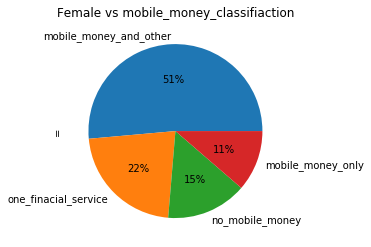

In [7]:
male = training[training.gender=='male']
female = training[training.gender=='female']
male.mobile_money_classification.value_counts('%').plot(kind='pie', subplots=True, figsize=(4, 4), autopct='%1.0f%%', label='=')
plt.title('Male vs mobile_money_classifiaction')
plt.show()
female.mobile_money_classification.value_counts().plot(kind='pie', subplots=True, figsize=(4, 4), autopct='%1.0f%%', label='=')
plt.title('Female vs mobile_money_classifiaction')
plt.show()

In [8]:
male.mobile_money_classification.value_counts()

mobile_money_and_other    1521
one_finacial_service      1083
no_mobile_money            918
mobile_money_only          450
Name: mobile_money_classification, dtype: int64

most of female and male uses mobile_money_and_other, about 25% uses one_finacial_service and 11% uses mobile_money_only.

### Relationship between finacial and marital_status

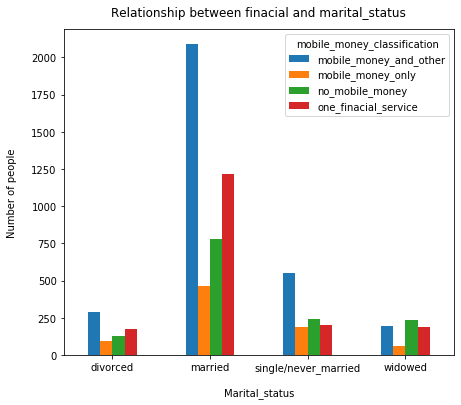

In [9]:
df = training.groupby(['marital_status', 'mobile_money_classification'])['marital_status'].count().unstack('mobile_money_classification').fillna(0)
df.plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Marital_status", labelpad=14)
plt.ylabel("Number of people", labelpad=14)
plt.title("Relationship between finacial and marital_status", y=1.02)
plt.show()

married people has a larger population than other marital_status, however mobile_money and other dominates to all marital status except widowed despite number of people.

### Relationship between finacial and land_owner

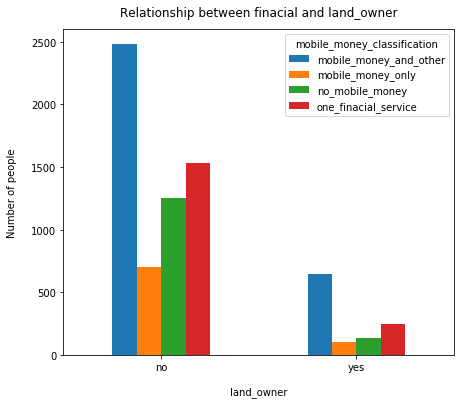

In [10]:
data = training.groupby(['land_owner', 'mobile_money_classification'])['land_owner'].count().unstack('mobile_money_classification').fillna(0)
data.plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("land_owner", labelpad=14)
plt.ylabel("Number of people", labelpad=14)
plt.title("Relationship between finacial and land_owner", y=1.02)
plt.show()

There are few land_owners in tanzania but most of them uses mobile_money_and_other but people without land use it more and has lager population

### both mobile and non mobile type of income.

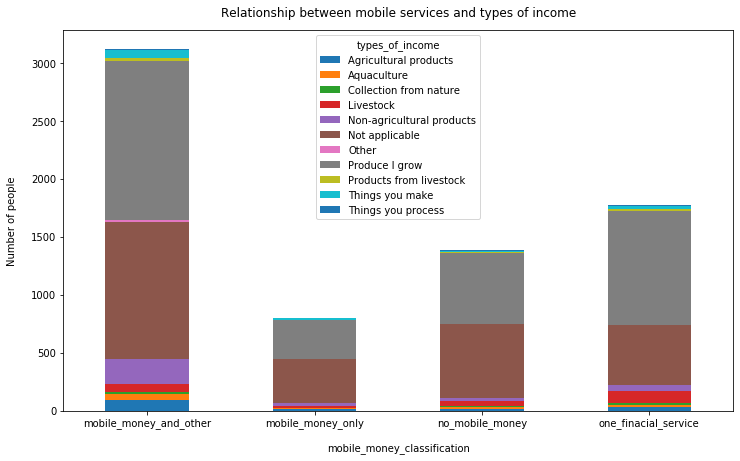

In [11]:
incom = training.groupby(['providing_service', 'mobile_money_classification'])['mobile_money_classification'].count().unstack('providing_service').fillna(0)
typx = training.groupby(['types_of_income', 'mobile_money_classification'])['mobile_money_classification'].count().unstack('types_of_income').fillna(0)
typx.plot(kind='bar', figsize=(12, 7), rot=0, stacked=True)
plt.title("Relationship between mobile services and types of income", y=1.02)
plt.xlabel("mobile_money_classification", labelpad=14)
plt.ylabel("Number of people", labelpad=14)
plt.show()

people who uses mobile_money_and_other are mostly people who produce they grow and not applicable

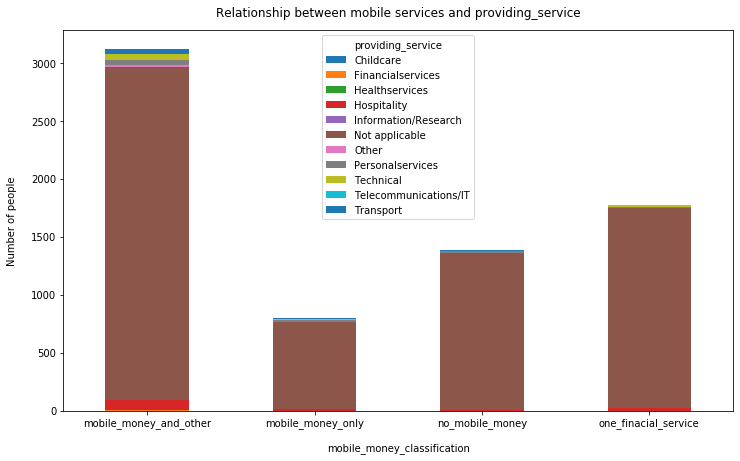

In [12]:
incom.plot(kind='bar', figsize=(12, 7), rot=0, stacked=True)
plt.xlabel("mobile_money_classification", labelpad=14)
plt.ylabel("Number of people", labelpad=14)
plt.title("Relationship between mobile services and providing_service", y=1.02)
plt.show()

## 4.Create appropriate graphs to visually represent the relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income.

### relationship between mobile services and age

* selecting people with mobile money 
* plotting stacked graphy of age versus how often do you use mobile services

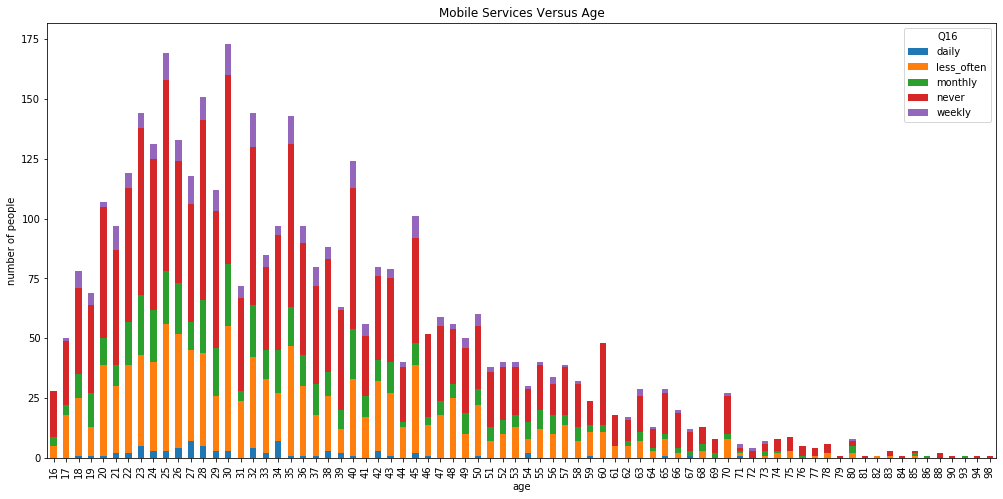

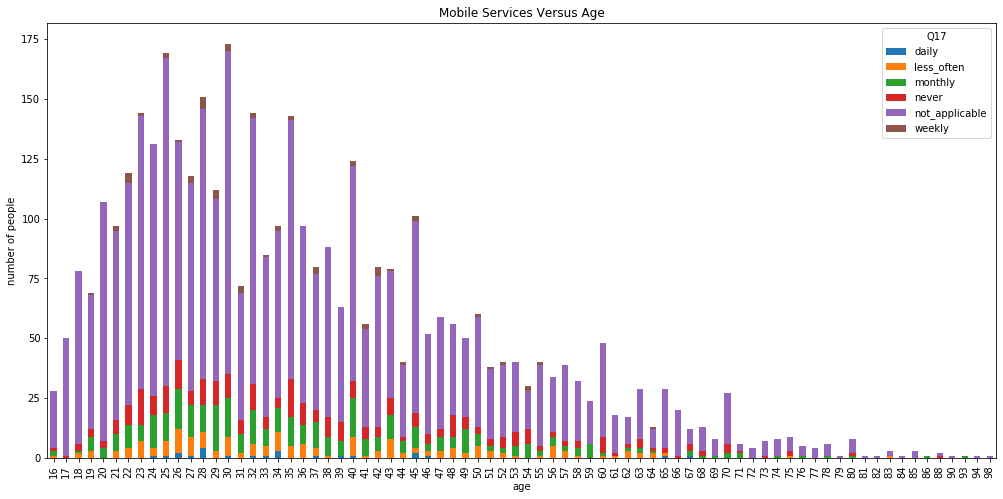

In [13]:
m_money = training[training.mobile_money=='yes']
m_money_age = m_money.groupby(['age', 'Q16'])['age'].count().unstack('Q16').fillna(0)
m_money_age.plot(kind='bar', figsize=(17, 8), label='male', stacked=True)
plt.xlabel('age')
plt.ylabel('number of people')
plt.title('Mobile Services Versus Age')
m_money_agea = m_money.groupby(['age', 'Q17'])['age'].count().unstack('Q17').fillna(0)
m_money_agea.plot(kind='bar', figsize=(17, 8), label='male', stacked=True)
plt.xlabel('age')
plt.ylabel('number of people')
plt.title('Mobile Services Versus Age')
plt.show()

### Relationship between mobile services and gender

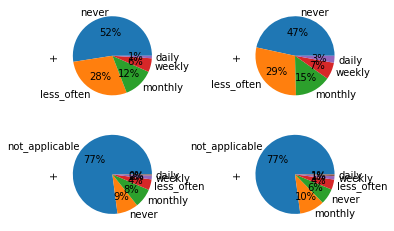

In [14]:
male = m_money[m_money.gender=='male']
female = m_money[m_money.gender=='female']
fig = plt.figure()
ax1 = fig.add_subplot(221)
male.Q16.value_counts().plot(kind='pie', subplots=True, figsize=(10, 10), autopct='%1.0f%%', label='+')
ax1 = fig.add_subplot(222)
female.Q16.value_counts().plot(kind='pie', subplots=True, figsize=(5, 5), autopct='%1.0f%%', label='+')
ax1 = fig.add_subplot(223)
male.Q17.value_counts().plot(kind='pie', subplots=True, figsize=(5, 5), autopct='%1.0f%%', label='+')
ax1 = fig.add_subplot(224)
female.Q17.value_counts().plot(kind='pie', subplots=True, figsize=(5, 5), autopct='%1.0f%%', label='+')
plt.show()

### Relationship between mobile services and marital status

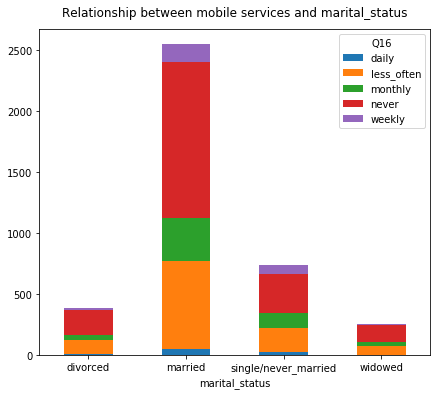

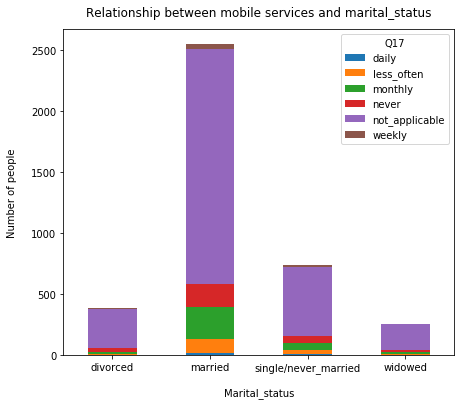

In [15]:
marital_q16 = m_money.groupby(['marital_status', 'Q16'])['marital_status'].count().unstack('Q16').fillna(0)
marital_q16.plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.title("Relationship between mobile services and marital_status", y=1.02)
marital_q17 = m_money.groupby(['marital_status', 'Q17'])['marital_status'].count().unstack('Q17').fillna(0)
marital_q17.plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.xlabel("Marital_status", labelpad=14)
plt.ylabel("Number of people", labelpad=14)
plt.title("Relationship between mobile services and marital_status", y=1.02)
plt.show()

In [16]:
marital_q16

Q16,daily,less_often,monthly,never,weekly
marital_status,,,,,
divorced,5,120,37,207,14
married,47,727,350,1278,148
single/never_married,22,203,120,323,71
widowed,2,74,30,139,13


In [18]:
divorced = np.array(marital_q16.iloc[0:1])
married = np.array(marital_q16.iloc[1:2])
single = np.array(marital_q16.iloc[2:3])
widowed = np.array(marital_q16.iloc[3:4])
male.mobile_money_classification.value_counts()

mobile_money_and_other    1521
mobile_money_only          450
Name: mobile_money_classification, dtype: int64

In [ ]:
app = dash.Dash()

colors = {'background':'#111111','text':'#7FDBFF'}

app.layout = html.Div([
            html.H1('hellow Dash!',style={'textAlign':'center',
                                          'color':'red'}),
            
            dcc.Graph(id='Mobile_money_BAR_GRAPH',
                      figure={'data':[go.Bar(x=training.mobile_money.values,y=training.index)
                                                                   ],
                            'layout':go.Layout(title='BAR GRAPH')})
            ,


        
            dcc.Graph(id='male',
                      figure={'data':[go.Pie(labels=['mobile_money_and_other','no_mobile_money','one_finacial_service','mobile_money_only'],
                                            values=np.array(male.mobile_money_classification.value_counts())),
                                    ],

                              'layout':go.Layout(title='pie charts')})
            ,
    
            dcc.Graph(id='Female',
                      figure={'data':[go.Pie(labels=['mobile_money_and_other','no_mobile_money','one_finacial_service','mobile_money_only'],
                                            values=np.array(female.mobile_money_classification.value_counts())),
                                    ],

                              'layout':go.Layout(title='pie charts')})
    
            ,
            dcc.Graph(id='BAR_GRAPH',
                      figure={'data':[go.Bar(x=training.age,y=training.mobile_money)
                                      
                             ],
                            'layout':go.Layout(title='BAR GRAPH AGE')})
            ,
            dcc.Graph(id='BAR_GRAH',
                      figure={'data':[go.Bar(x=['marital_q16.daily','marital_q16.less_often','marital_q16.monthly','marital_q16.never','marital_q16.weekly'],y=marital_q16)
                                      
                             ],
                            'layout':go.Layout(title='BAR GRAPH AE',barmode='stack')})
])


if __name__ =='__main__':
    app.run_server()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [17/Mar/2020 16:39:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Mar/2020 16:39:59] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [17/Mar/2020 16:39:59] "GET /_favicon.ico?v=1.9.1 HTTP/1.1" 200 -
127.0.0.1 - - [17/Mar/2020 16:39:59] "GET /_dash-layout HTTP/1.1" 200 -


### Relationship between mobile services and land ownership

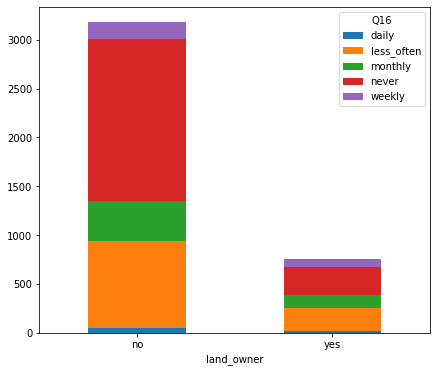

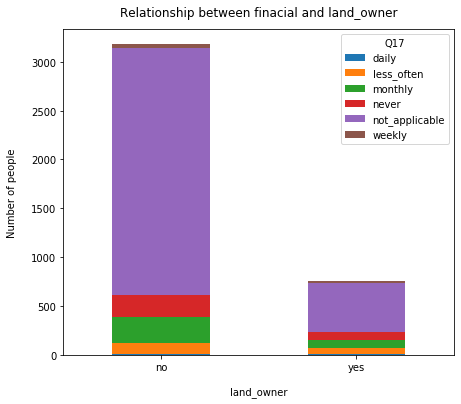

In [13]:
land = m_money.groupby(['land_owner', 'Q16'])['land_owner'].count().unstack('Q16').fillna(0)
land.plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.show()
lan = m_money.groupby(['land_owner', 'Q17'])['land_owner'].count().unstack('Q17').fillna(0).plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.xlabel("land_owner", labelpad=14)
plt.ylabel("Number of people", labelpad=14)
plt.title("Relationship between finacial and land_owner", y=1.02)
plt.show()

### Relationship between mobile services and types of income

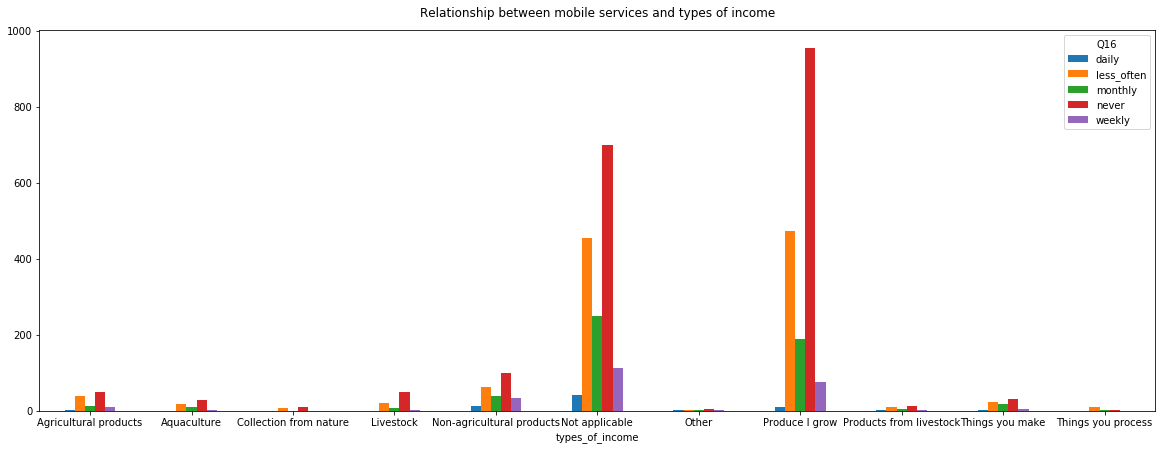

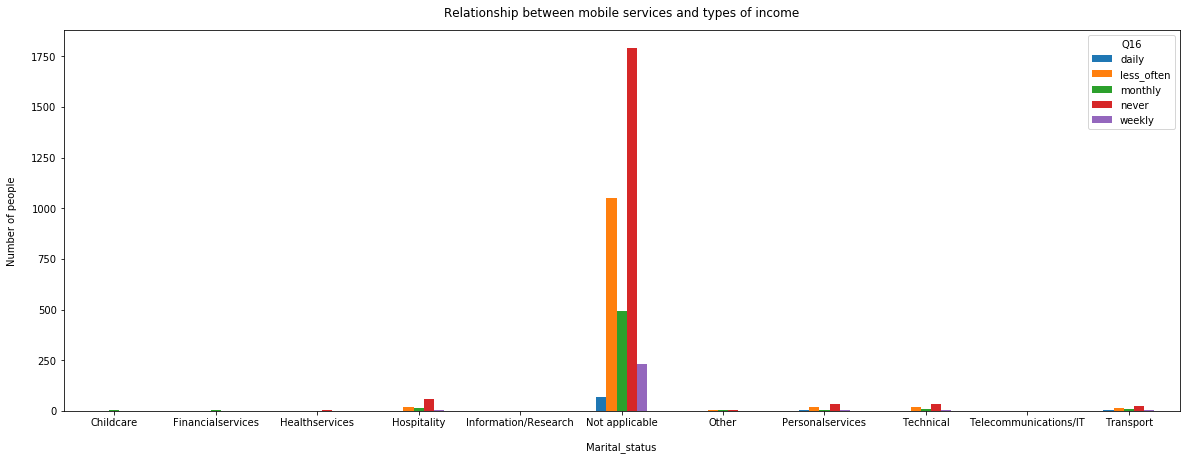

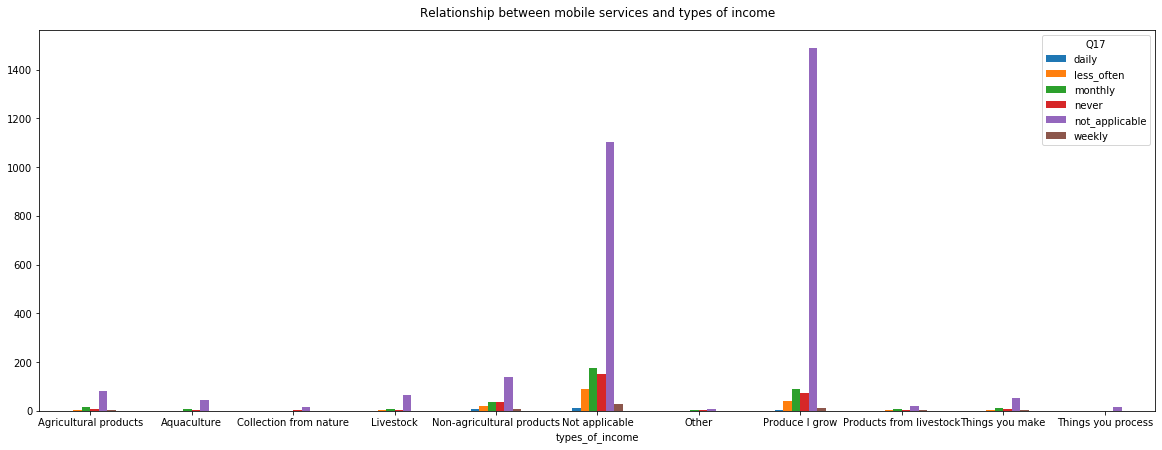

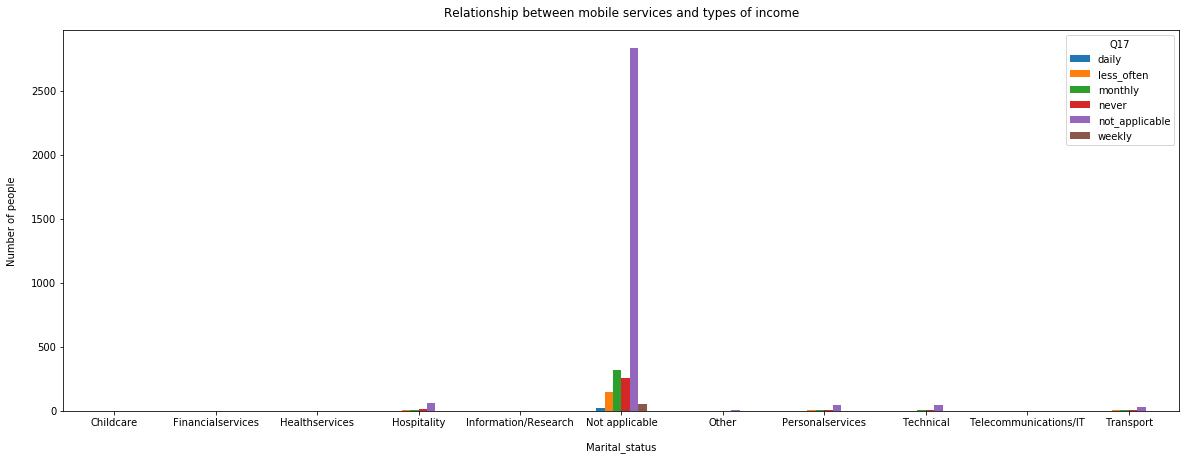

In [14]:
income = m_money.groupby(['providing_service', 'Q16'])['providing_service'].count().unstack('Q16').fillna(0)
types = m_money.groupby(['types_of_income', 'Q16'])['types_of_income'].count().unstack('Q16').fillna(0)
types.plot(kind='bar', figsize=(20, 7), rot=0)
plt.title("Relationship between mobile services and types of income", y=1.02)
income.plot(kind='bar', figsize=(20, 7), rot=0)
plt.xlabel("Marital_status", labelpad=14)
plt.ylabel("Number of people", labelpad=14)
plt.title("Relationship between mobile services and types of income", y=1.02)
incom = m_money.groupby(['providing_service', 'Q17'])['providing_service'].count().unstack('Q17').fillna(0)
typew = m_money.groupby(['types_of_income', 'Q17'])['types_of_income'].count().unstack('Q17').fillna(0)
typew.plot(kind='bar', figsize=(20, 7), rot=0)
plt.title("Relationship between mobile services and types of income", y=1.02)
incom.plot(kind='bar', figsize=(20, 7), rot=0)
plt.xlabel("Marital_status", labelpad=14)
plt.ylabel("Number of people", labelpad=14)
plt.title("Relationship between mobile services and types of income", y=1.02)
plt.show()

## 5.Create a map to visually explore geographic distribution of mobile services coverage with respect to type of income.

In [15]:
#map to visually explore geographic distribution of mobile services coverage with respect to type of income.
!{sys.executable} -m pip install folium --user
import folium
from folium.plugins import MarkerCluster
maps = folium.Map(location=[-6.161184, 35.745426], tiles='OpenStreetMap', zoom_start=6)
marker_cluster = MarkerCluster().add_to(maps)
for lat, long in zip(training.Latitude, training.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)
maps

/bin/sh: 1: {sys.executable}: not found


## 6.What can you conclude about use of financial services in Tanzania? Which demographic and geographic factors are associated with mobile money use?

Tanzania mobile money is used mostly by people doing pisjobs and usually located in the countries edges.Various financial services, such as types_of_income covers via mobile money and the credit services offered by mobile operators, have increased the number of mobile money accounts in the region. 